In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full1 = X_train_full.copy()

In [5]:
X_train_full.shape, X_train_full[0].dtype

((60000, 28, 28), dtype('uint8'))

In [6]:
### normalizing the data and converting into float and splitting into validation set
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
## class name coding
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## Classification NLP with 2 hidden layers

In [8]:
model = keras.models.Sequential()   ###what is sequential
model.add(keras.layers.Flatten(input_shape=[28, 28]))         ##flatten basically do X.reshape(-1,1)
model.add(keras.layers.Dense(300, activation="relu"))         ##meaning of DENSE: Dense layer has connection weight and bias term
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.layers

In [11]:
hidden1 =model.layers[3]
hidden1.name

'dense_2'

In [12]:
weights, biases= hidden1.get_weights()

In [13]:
weights  ##all weights are randomly initialized

array([[ 1.50375783e-01,  2.30022967e-01,  2.00874984e-01,
         1.21016294e-01, -1.56700090e-01,  4.23700511e-02,
        -2.01121569e-02, -1.17597051e-01,  1.02487236e-01,
         1.58277065e-01],
       [ 5.44692576e-03,  8.80390108e-02, -1.61606848e-01,
         9.02342498e-02,  1.44425988e-01, -1.91253871e-01,
        -7.04802573e-03, -1.21549509e-01,  3.79258096e-02,
         1.30960703e-01],
       [-1.80726171e-01, -3.81371677e-02,  1.76637679e-01,
        -2.19936967e-01,  2.21139163e-01, -1.49084210e-01,
         6.60893321e-02, -1.79223865e-02, -7.19298720e-02,
         8.51238668e-02],
       [-2.30795786e-01,  6.17153049e-02, -3.56692672e-02,
         7.03987777e-02,  1.64626449e-01,  9.95421410e-03,
        -1.78359672e-01, -1.81196868e-01,  9.18526649e-02,
         4.91654873e-03],
       [-1.36772349e-01,  1.10279322e-02, -2.07475260e-01,
         1.52929097e-01,  2.19514549e-01, -9.89477783e-02,
         1.89406812e-01, -2.69710869e-02, -1.94224477e-01,
         6.

In [14]:
weights.shape, biases.shape

((100, 10), (10,))

In [15]:
optimizer = keras.optimizers.SGD(lr=0.05)
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = optimizer ,       ##using stochastic gradient descent , ##default lr=0.01
              metrics = ['accuracy']
            )
#optimizer=keras.optimizers.SGD(lr=???) to tweak lr value

In [16]:
history = model.fit(X_train, y_train, epochs = 300, validation_data = (X_valid, y_valid))   # batch size of 32 by default

Train on 55000 samples, validate on 5000 samples
Epoch 1/300
55000/55000 [==============================] - 5s 99us/sample - loss: 0.5570 - accuracy: 0.8020 - val_loss: 0.4490 - val_accuracy: 0.8394
Epoch 2/300
55000/55000 [==============================] - 5s 85us/sample - loss: 0.4013 - accuracy: 0.8531 - val_loss: 0.3685 - val_accuracy: 0.8690
Epoch 3/300
37952/55000 [===================>..........] - ETA: 1s - loss: 0.3653 - accuracy: 0.8657

KeyboardInterrupt: 

In [ ]:
## WTF: first time accuracy very less, some days later accuracy very high????

In [100]:
history.params

{'batch_size': 32,
 'epochs': 50,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [101]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

In [102]:
history.history

{'loss': [2.0349113553133877,
  1.638906796386025,
  1.4277146850932727,
  1.2469928001923996,
  1.1418247132561423,
  1.089323394836079,
  1.0247372596307234,
  0.9812591831554066,
  0.9464964684486389,
  0.9097147696148266,
  0.8989258478338068,
  0.8940390441374345,
  0.8415010527437383,
  0.8426401129462502,
  0.8432352956251664,
  0.808265104302493,
  0.8006320123412393,
  0.796559645279971,
  0.7593593741156838,
  0.7568997311115265,
  0.7547229614084418,
  0.7433714560855519,
  0.735589099667289,
  0.7314592142798684,
  0.7200575903198936,
  0.7080963943741538,
  0.7061597985441035,
  0.6966395112557845,
  0.6974763603297147,
  0.6898414232340726,
  0.6976583211118524,
  0.6773355952002785,
  0.6883462723558599,
  0.6727672119140625,
  0.6867278983289545,
  0.6645367756236683,
  0.6583254028537057,
  0.663977744774385,
  0.6515915693022988,
  0.6514437749819322,
  0.6555939851110631,
  0.6437944416392933,
  0.6400154791571877,
  0.6380491806420413,
  0.6306223556431857,
  0.6321

In [104]:
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

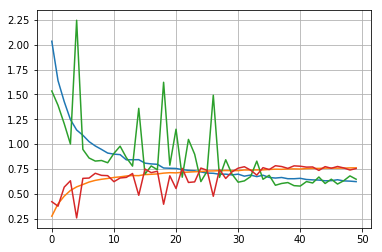

In [105]:
import matplotlib.pyplot as plt
plt.plot(loss)
plt.plot(accuracy)
plt.plot(val_loss)
plt.plot(val_accuracy)
# plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

In [106]:
model.evaluate(X_test, y_test)  ##CHECK DOCUMENTATION 

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[42278.1858875, 0.5399]

In [77]:
#making predictions
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Using TensorFlow backend.


Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)
